# Naive Analysis

In [123]:
# Useful Imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

## Ethnic diversity

### Dataframe

In [124]:
# Load Datasets
ethnicity_diversity_df = pd.read_csv('generated/ethnicity_diversity.csv')
# gender_diversity_df = pd.read_csv("generated/gender_diversity.csv")

In [125]:
# Display ethnicity_diversity_df dataframe
display(ethnicity_diversity_df)

,movie_freebase_id,movie_name,movie_release_year,movie_languages_count,movie_genres,ethnicity_diversity,actors_count,rating_average,rating_count,movie_box_office_revenue
0,/m/031hcx,Harry Potter and the Order of the Phoenix,2007.0,22,"['Mystery', 'Family Film', 'Fantasy Adventure'...",0.744898,28,7.685,18416,7.263377
1,/m/02qr3k8,Terror in the Aisles,1984.0,22,"['Thriller', 'Horror', 'Documentary']",0.850480,27,6.100,37,-0.425137
2,/m/031786,Harry Potter and the Goblet of Fire,2005.0,32,"['Thriller', 'Science Fiction', 'Fantasy Adven...",0.793600,25,7.815,19551,6.908049
3,/m/03l6q0,Scary Movie 3,2003.0,22,"['Parody', 'Horror', 'Absurdism', 'Gross-out f...",0.760417,24,5.977,3815,1.316728
4,/m/011ywj,Gosford Park,2001.0,22,"['Thriller', 'Ensemble Film', 'LGBT', 'Comedy ...",0.548204,23,6.853,997,0.217715
...,...,...,...,...,...,...,...,...,...,...
12635,/m/0270d95,The Painted Veil,1934.0,22,"['Drama', 'Black-and-white', 'War film']",0.500000,2,6.400,21,NaN
12636,/m/06zdqc,Passport to Paris,1999.0,22,"['Romance Film', 'Family Film', 'Comedy', 'Tee...",0.500000,2,6.187,289,NaN
12637,/m/02y8kn,Mark of the Vampire,1935.0,22,"['Thriller', 'Detective fiction', 'Horror', 'D...",0.500000,2,6.100,117,NaN
12638,/m/080b28t,Genesis,1999.0,2,"['Drama', 'World cinema']",0.000000,2,5.700,3,NaN


### Evolution of Ethnic Diversity

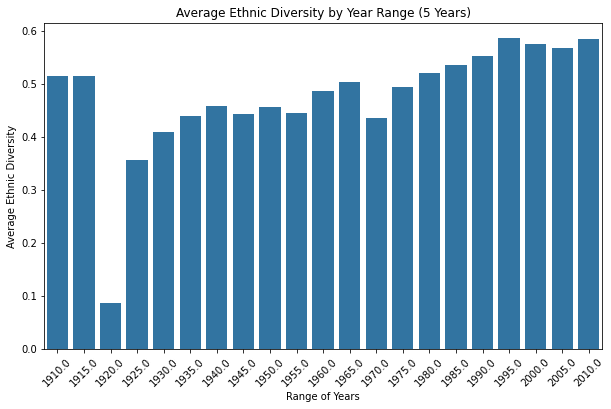

In [126]:
# Show the average ethnic diversity for each year range (5 years)

# Calculation of average ethnic diversity per 5-year period
ethnicity_diversity_df['year_bin'] = (ethnicity_diversity_df['movie_release_year'] // 5) * 5

# Calculation of the average of ethnic diversity for each 10-year period
average_ethnic_diversity_by_decade = ethnicity_diversity_df.groupby('year_bin')['ethnicity_diversity'].mean().reset_index()

# Creation of the histogram
plt.figure(figsize=(10, 6))
sns.barplot(data=average_ethnic_diversity_by_decade, x='year_bin', y='ethnicity_diversity')
plt.title('Average Ethnic Diversity by Year Range (5 Years)')
plt.xlabel('Range of Years')
plt.ylabel('Average Ethnic Diversity')
plt.xticks(rotation=45)
plt.show()

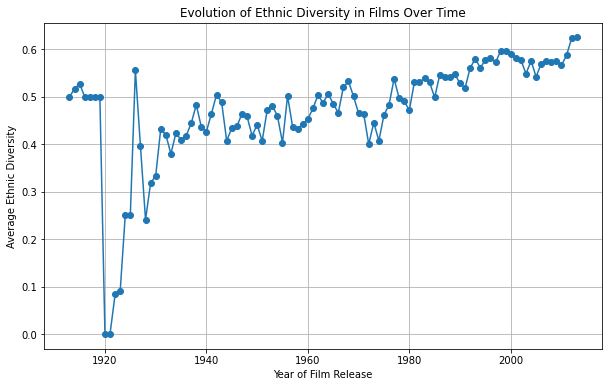

In [127]:
# Calculation of the average of ethnic diversity per year
average_ethnic_diversity_per_year = ethnicity_diversity_df.groupby('movie_release_year')['ethnicity_diversity'].mean()

# Creation of the graph
plt.figure(figsize=(10, 6))
average_ethnic_diversity_per_year.plot(kind='line', marker='o')
plt.title('Evolution of Ethnic Diversity in Films Over Time')
plt.xlabel('Year of Film Release')
plt.ylabel('Average Ethnic Diversity')
plt.grid(True)
plt.show()

In [128]:
# Visualize whether ethnic diversity in films has increased over time

# Grouping by year of exit and calculation of the average of ethnic diversity
ethnic_diversity_by_year = ethnicity_diversity_df.groupby('movie_release_year')['ethnicity_diversity'].mean().reset_index()

# Creation of the interactif graph
fig = px.line(ethnic_diversity_by_year, x='movie_release_year', y='ethnicity_diversity', 
              title='Evolution of Ethnic Diversity in Films Over Time',
              labels={'movie_release_year': 'Year of Film Release', 'ethnicity_diversity': 'Average Ethnic Diversity'})
fig.show()

### Impact of Ethnic Diversity

In [129]:
# Remove rows with NaNs in column "movie_box_office_revenue"
ethnicity_diversity_box_office_df = ethnicity_diversity_df.dropna(subset=['movie_box_office_revenue'])

print(ethnicity_diversity_box_office_df.shape)

(4683, 11)


#### Impact of Ethnic Diversity on Box Office

In [130]:
# Correlation calculation between ethnicity_diversity score and box office revenue
correlation = ethnicity_diversity_box_office_df['ethnicity_diversity'].corr(ethnicity_diversity_box_office_df['movie_box_office_revenue'])
correlation

0.21742488328293136

In [131]:
# Regression analysis to assess the relationship between ethnic diversity and box office revenue

# Preparing data for regression
X = ethnicity_diversity_box_office_df[['ethnicity_diversity']] # Independent variable
y = ethnicity_diversity_box_office_df['movie_box_office_revenue'] # Dependent variable 

# Adding a constant to X
X = sm.add_constant(X)

# Linear regression
model = sm.OLS(y, X).fit()

# Model summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     movie_box_office_revenue   R-squared:                       0.047
Model:                                  OLS   Adj. R-squared:                  0.047
Method:                       Least Squares   F-statistic:                     232.3
Date:                      Sat, 16 Dec 2023   Prob (F-statistic):           3.18e-51
Time:                              15:26:49   Log-Likelihood:                -6531.0
No. Observations:                      4683   AIC:                         1.307e+04
Df Residuals:                          4681   BIC:                         1.308e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

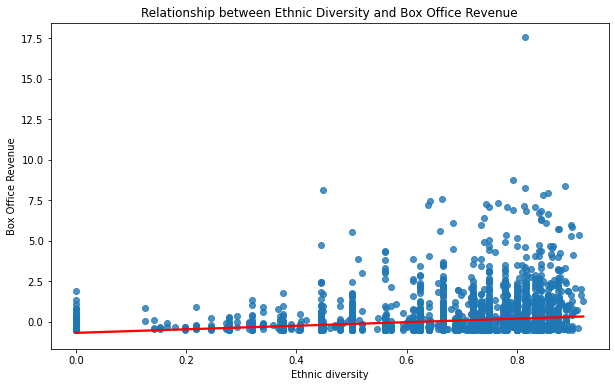

In [132]:
# View a regression graph to visualize the relationship between ethnic diversity and movie box office revenue

# Plot the regression graph that shows the relationship between ethnic diversity and box office revenue
plt.figure(figsize=(10, 6))
sns.regplot(
    x='ethnicity_diversity',
    y='movie_box_office_revenue',
    data=ethnicity_diversity_box_office_df,
    line_kws={'color': 'red'},
    ci=95
)
plt.title('Relationship between Ethnic Diversity and Box Office Revenue')
plt.xlabel('Ethnic diversity')
plt.ylabel('Box Office Revenue')
plt.show()

#### Impact of Ethnic Diversity on Average Rating

In [133]:
# Correlation calculation between ethnicity_diversity score and average rating
correlation = ethnicity_diversity_df['ethnicity_diversity'].corr(ethnicity_diversity_df['rating_average'])
correlation

0.06238477728578291

In [134]:
# Regression analysis to assess the relationship between ethnic diversity and average rating

# Preparing data for regression
X = ethnicity_diversity_df[['ethnicity_diversity']] # Independent variable
y = ethnicity_diversity_df['rating_average'] # Dependent variable 

# Adding a constant to X
X = sm.add_constant(X)

# Linear regression
model = sm.OLS(y, X).fit()

# Model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         rating_average   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     49.38
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           2.22e-12
Time:                        15:26:50   Log-Likelihood:                -23376.
No. Observations:               12640   AIC:                         4.676e+04
Df Residuals:                   12638   BIC:                         4.677e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.6095    

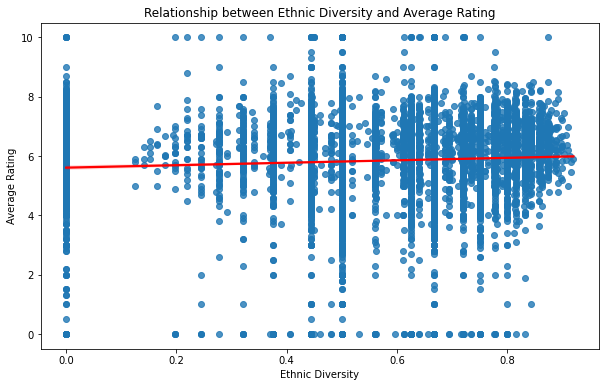

In [135]:
# View a regression graph to visualize the relationship between ethnic diversity and average rating

# Plot the regression graph that shows the relationship between ethnic diversity and average rating
plt.figure(figsize=(10, 6))
sns.regplot(
    x='ethnicity_diversity',
    y='rating_average',
    data=ethnicity_diversity_df,
    line_kws={'color': 'red'},
    ci=95
)
plt.title('Relationship between Ethnic Diversity and Average Rating')
plt.xlabel('Ethnic Diversity')
plt.ylabel('Average Rating')
plt.show()

#### Impact of Ethnic Diversity on Movie Performance

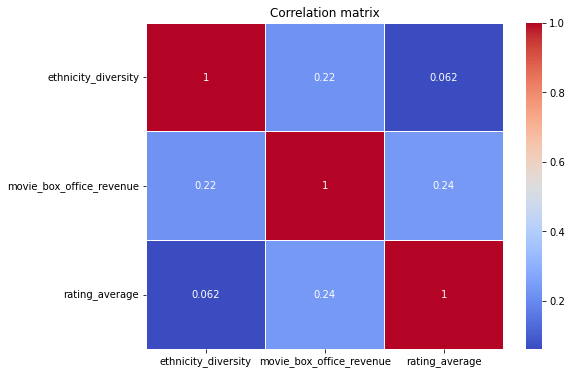

In [136]:
correlation_matrix = ethnicity_diversity_df[['ethnicity_diversity', 'movie_box_office_revenue', 'rating_average']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

## Gender diversity

### Dataframe

In [137]:
# Load Datasets
gender_diversity_df = pd.read_csv("generated/gender_diversity.csv")

In [138]:
# Display gender_diversity_df dataframe
display(gender_diversity_df)

,movie_freebase_id,movie_name,movie_release_year,movie_languages_count,movie_genres,gender_diversity,actors_count,rating_average,rating_count,movie_box_office_revenue
0,/m/0cc8620,Hemingway & Gellhorn,2012.0,22,"['Romance Film', 'Drama']",0.377164,115,6.000,158,NaN
1,/m/04grkmd,Taking Woodstock,2009.0,22,"['Indie', 'Slice of life story', 'Comedy-drama...",0.409565,87,6.211,405,-0.358824
2,/m/02725hs,Captain Corelli's Mandolin,2001.0,35,"['Film adaptation', 'War film', 'Period piece'...",0.371895,81,5.946,488,1.840898
3,/m/02qr3k8,Terror in the Aisles,1984.0,22,"['Thriller', 'Horror', 'Documentary']",0.491782,78,6.100,37,-0.355676
4,/m/01w8g3,Calendar Girls,2003.0,22,"['Ensemble Film', 'Drama', 'Indie', 'Comedy']",0.492654,66,6.593,350,3.292231
...,...,...,...,...,...,...,...,...,...,...
29882,/m/0hzqvb3,Varnam,2010.0,21,['Drama'],0.500000,2,0.000,0,NaN
29883,/m/02pqq45,We're All Christs,2006.0,22,['Drama'],0.000000,2,6.643,42,NaN
29884,/m/09j44z,Rip Girls,2000.0,22,['Family Film'],0.500000,2,6.400,59,NaN
29885,/m/0514m7q,Touch the Sound,2004.0,22,"['Music', 'Instrumental Music', 'Biography', '...",0.500000,2,7.300,11,-0.769968


### Evolution of Gender Diversity

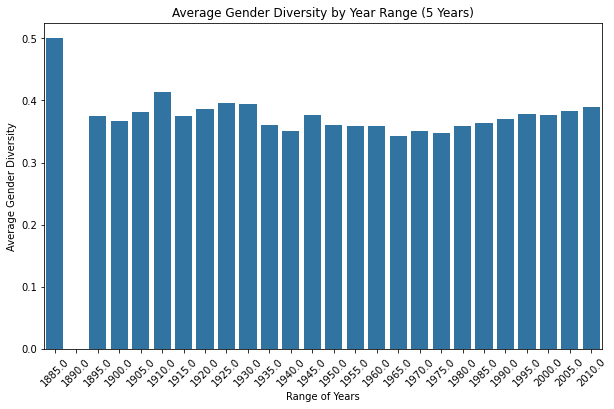

In [139]:
# Show the average gender diversity for each year range (5 years)

# Calculation of average gender diversity per 5-year period
gender_diversity_df['year_bin'] = (gender_diversity_df['movie_release_year'] // 5) * 5

# Calculation of the average of gender diversity for each 10-year period
average_gender_diversity_by_decade = gender_diversity_df.groupby('year_bin')['gender_diversity'].mean().reset_index()

# Creation of the histogram
plt.figure(figsize=(10, 6))
sns.barplot(data=average_gender_diversity_by_decade, x='year_bin', y='gender_diversity')
plt.title('Average Gender Diversity by Year Range (5 Years)')
plt.xlabel('Range of Years')
plt.ylabel('Average Gender Diversity')
plt.xticks(rotation=45)
plt.show()

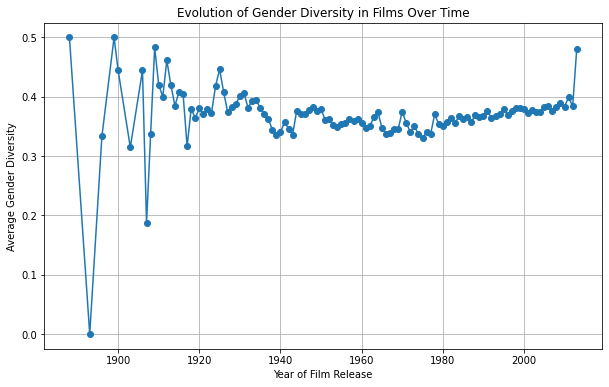

In [140]:
# Calculation of the average of ethnic diversity per year
average_gender_diversity_per_year = gender_diversity_df.groupby('movie_release_year')['gender_diversity'].mean()

# Creation of the graph
plt.figure(figsize=(10, 6))
average_gender_diversity_per_year.plot(kind='line', marker='o')
plt.title('Evolution of Gender Diversity in Films Over Time')
plt.xlabel('Year of Film Release')
plt.ylabel('Average Gender Diversity')
plt.grid(True)
plt.show()

In [141]:
# Visualize whether ethnic diversity in films has increased over time

# Grouping by year of exit and calculation of the average of gender diversity
gender_diversity_by_year = gender_diversity_df.groupby('movie_release_year')['gender_diversity'].mean().reset_index()

# Creation of the interactif graph
fig = px.line(gender_diversity_by_year, x='movie_release_year', y='gender_diversity', 
              title='Evolution of Gender Diversity in Films Over Time',
              labels={'movie_release_year': 'Year of Film Release', 'gender_diversity': 'Average Gender Diversity'})
fig.show()

### Impact of Gender Diversity

In [142]:
# Remove rows with NaNs in column "movie_box_office_revenue"
gender_diversity_box_office_df = gender_diversity_df.dropna(subset=['movie_box_office_revenue'])

print(gender_diversity_box_office_df.shape)

(5600, 11)


#### Impact of Gender Diversity on Box Office

In [143]:
# Correlation calculation between gender_diversity score and box office revenue
correlation = gender_diversity_box_office_df['gender_diversity'].corr(gender_diversity_box_office_df['movie_box_office_revenue'])
correlation

-0.0003655086589473291

In [144]:
# Regression analysis to assess the relationship between gender diversity and box office revenue

# Preparing data for regression
X = gender_diversity_box_office_df[['gender_diversity']] # Independent variable
y = gender_diversity_box_office_df['movie_box_office_revenue'] # Dependent variable 

# Adding a constant to X
X = sm.add_constant(X)

# Linear regression
model = sm.OLS(y, X).fit()

# Model summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     movie_box_office_revenue   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                 -0.000
Method:                       Least Squares   F-statistic:                 0.0007479
Date:                      Sat, 16 Dec 2023   Prob (F-statistic):              0.978
Time:                              15:26:54   Log-Likelihood:                -7945.6
No. Observations:                      5600   AIC:                         1.590e+04
Df Residuals:                          5598   BIC:                         1.591e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

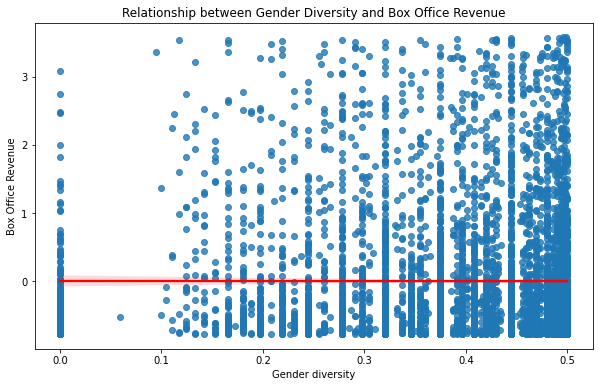

In [145]:
# View a regression graph to visualize the relationship between gender diversity and movie box office revenue

# Plot the regression graph that shows the relationship between gender diversity and box office revenue
plt.figure(figsize=(10, 6))
sns.regplot(
    x='gender_diversity',
    y='movie_box_office_revenue',
    data=gender_diversity_box_office_df,
    line_kws={'color': 'red'},
    ci=95
)
plt.title('Relationship between Gender Diversity and Box Office Revenue')
plt.xlabel('Gender diversity')
plt.ylabel('Box Office Revenue')
plt.show()

#### Impact of Gender Diversity on Average Rating

In [146]:
# Correlation calculation between gender_diversity score and average rating
correlation = gender_diversity_df['gender_diversity'].corr(gender_diversity_df['rating_average'])
correlation

-0.0052923788959889076

In [147]:
# Regression analysis to assess the relationship between gender diversity and average rating

# Preparing data for regression
X = gender_diversity_df[['gender_diversity']] # Independent variable
y = gender_diversity_df['rating_average'] # Dependent variable 

# Adding a constant to X
X = sm.add_constant(X)

# Linear regression
model = sm.OLS(y, X).fit()

# Model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         rating_average   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8371
Date:                Sat, 16 Dec 2023   Prob (F-statistic):              0.360
Time:                        15:26:55   Log-Likelihood:                -61362.
No. Observations:               29887   AIC:                         1.227e+05
Df Residuals:                   29885   BIC:                         1.227e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.5410      0.028  

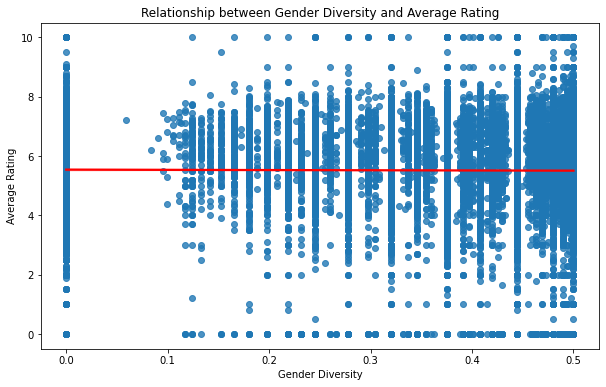

In [148]:
# View a regression graph to visualize the relationship between gender diversity and average rating

# Plot the regression graph that shows the relationship between gender diversity and average rating
plt.figure(figsize=(10, 6))
sns.regplot(
    x='gender_diversity',
    y='rating_average',
    data=gender_diversity_df,
    line_kws={'color': 'red'},
    ci=95
)
plt.title('Relationship between Gender Diversity and Average Rating')
plt.xlabel('Gender Diversity')
plt.ylabel('Average Rating')
plt.show()

#### Impact of Gender Diversity on Movie Performance

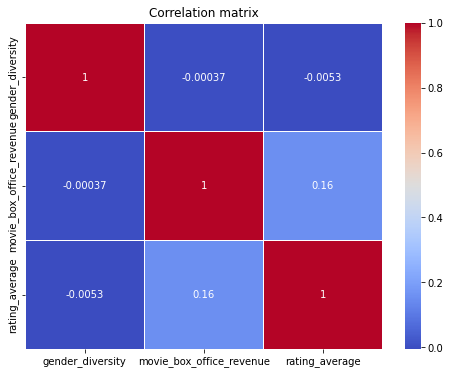

In [149]:
correlation_matrix = gender_diversity_df[['gender_diversity', 'movie_box_office_revenue', 'rating_average']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()